In [1]:
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
import requests
%matplotlib inline

In [40]:
date = input('Enter a date with the format YYYY-MM-DD: ')

Enter a date with the format YYYY-MM-DD: 1998-06-07


In [41]:
date

'1998-06-07'

In [42]:
'https://www.billboard.com/charts/hot-100/'+date

'https://www.billboard.com/charts/hot-100/1998-06-07'

In [43]:
req = requests.get('https://www.billboard.com/charts/hot-100/'+date)

In [44]:
soup = BeautifulSoup(req.text,'lxml')

In [45]:
soup.find('ol',{'class':'chart-list__elements'}).find_all('button')[0].find_all('span',{'class':'chart-element__rank flex--column flex--xy-center flex--no-shrink'})[0].text.split('\n')[2]

'Steady'

In [46]:
singles = [span.find_all('span',{'class':'chart-element__information__song text--truncate color--primary'})[0].text for span in soup.find('ol',{'class':'chart-list__elements'}).find_all('button')]

In [47]:
current_rank = [rank.find_all('span',{'class':'chart-element__rank__number'})[0].text for rank in soup.find('ol',{'class':'chart-list__elements'}).find_all('button')]

In [48]:
last_week = [last.find_all('span',{'class':'chart-element__meta text--center color--secondary text--last'})[0].text for last in soup.find('ol',{'class':'chart-list__elements'}).find_all('button')]

In [49]:
peak_rank = [peak.find_all('span',{'class':'chart-element__meta text--center color--secondary text--peak'})[0].text for peak in soup.find('ol',{'class':'chart-list__elements'}).find_all('button')]

In [50]:
artists = [name.find_all('span',{'class':'chart-element__information__artist text--truncate color--secondary'})[0].text for name in soup.find('ol',{'class':'chart-list__elements'}).find_all('button')]

In [51]:
duration = [nweek.find_all('span',{'class':'chart-element__meta text--center color--secondary text--week'})[0].text for nweek in soup.find('ol',{'class':'chart-list__elements'}).find_all('button')]

In [52]:
current_status = [status.find_all('span',{'class':'chart-element__rank flex--column flex--xy-center flex--no-shrink'})[0].text.split('\n')[2] for status in soup.find('ol',{'class':'chart-list__elements'}).find_all('button')]

In [53]:
zipped_results = zip(current_rank,singles,artists,current_status,last_week,peak_rank,duration)

In [54]:
bb100 = pd.DataFrame(zipped_results,columns=['Rank','Single','Artist','Status','Last Week','Peak','Duration']).set_index('Rank')

In [55]:
bb100.head(10)

,Single,Artist,Status,Last Week,Peak,Duration
Rank,,,,,,
1,The Boy Is Mine,Brandy & Monica,Steady,1,1,3
2,Too Close,Next,Steady,2,1,18
3,You're Still The One,Shania Twain,Steady,3,2,18
4,My All,Mariah Carey,Steady,4,1,6
5,I Get Lonely,Janet Featuring BLACKstreet,Steady,5,3,4
6,Everybody [Backstreet's Back],Backstreet Boys,Steady,6,4,9
7,All My Life,K-Ci & JoJo,Rising,8,1,12
8,Truly Madly Deeply,Savage Garden,Rising,9,1,28
9,The Arms Of The One Who Loves You,Xscape,Failing,7,7,7


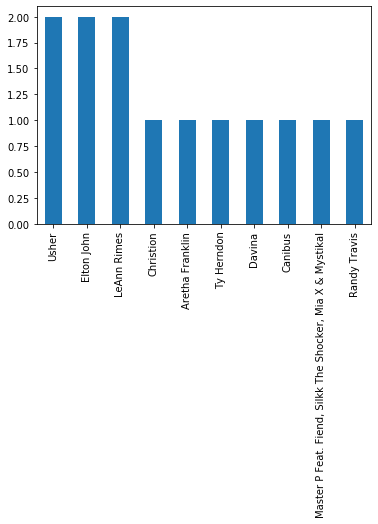

In [56]:
bb100['Artist'].value_counts().head(10).plot.bar()

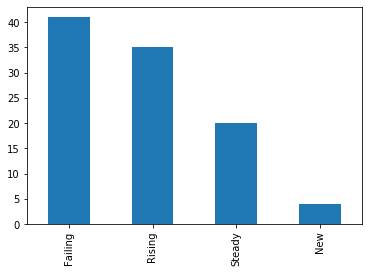

In [57]:
(bb100['Status'].value_counts()).plot.bar()

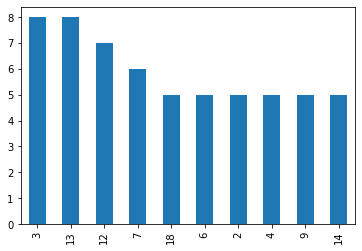

In [58]:
(bb100['Duration'].value_counts()).head(10).plot.bar()

# Final Code

In [7]:
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
import requests
%matplotlib inline

def billboardhot100():
    date = input('Enter a date with the format YYYY-MM-DD ---**If recent chart, just hit enter without a date: ')
    req = requests.get('https://www.billboard.com/charts/hot-100/'+date)
    soup = BeautifulSoup(req.text,'lxml')
    singles = [span.find_all('span',{'class':'chart-element__information__song text--truncate color--primary'})[0].text for span in soup.find('ol',{'class':'chart-list__elements'}).find_all('button')]
    current_rank = [rank.find_all('span',{'class':'chart-element__rank__number'})[0].text for rank in soup.find('ol',{'class':'chart-list__elements'}).find_all('button')]
    last_week = [last.find_all('span',{'class':'chart-element__meta text--center color--secondary text--last'})[0].text for last in soup.find('ol',{'class':'chart-list__elements'}).find_all('button')]
    peak_rank = [peak.find_all('span',{'class':'chart-element__meta text--center color--secondary text--peak'})[0].text for peak in soup.find('ol',{'class':'chart-list__elements'}).find_all('button')]
    artists = [name.find_all('span',{'class':'chart-element__information__artist text--truncate color--secondary'})[0].text for name in soup.find('ol',{'class':'chart-list__elements'}).find_all('button')]
    duration = [nweek.find_all('span',{'class':'chart-element__meta text--center color--secondary text--week'})[0].text for nweek in soup.find('ol',{'class':'chart-list__elements'}).find_all('button')]
    current_status = [status.find_all('span',{'class':'chart-element__rank flex--column flex--xy-center flex--no-shrink'})[0].text.split('\n')[2] for status in soup.find('ol',{'class':'chart-list__elements'}).find_all('button')]
    zipped_results = zip(current_rank,singles,artists,current_status,last_week,peak_rank,duration)
    bb100 = pd.DataFrame(zipped_results,columns=['Rank','Single','Artist','Status','Last Week','Peak','Duration']).set_index('Rank')
    top10 = bb100.head(10)
    return top10

In [8]:
billboardhot100()

Enter a date with the format YYYY-MM-DD ---**If recent chart, just hit enter without a date: 1996-06-07


,Single,Artist,Status,Last Week,Peak,Duration
Rank,,,,,,
1,Tha Crossroads,Bone Thugs-N-Harmony,Steady,1,1,5
2,Always Be My Baby,Mariah Carey,Steady,2,1,10
3,"Because You Loved Me (From ""Up Close & Personal"")",Celine Dion,Steady,3,1,14
4,Give Me One Reason,Tracy Chapman,Rising,5,4,10
5,You're The One,SWV,Rising,6,5,8
6,Nobody Knows,The Tony Rich Project,Failing,4,2,26
7,You're Makin' Me High/Let It Flow,Toni Braxton,New,-,7,1
8,Fastlove,George Michael,Steady,8,8,5
9,Ironic,Alanis Morissette,Failing,7,4,13
